<br>
<img src="https://ensea.ed.ci/wp-content/uploads/2021/07/logo_ensea.png" width=90px align="left">
<div align="right">Enseignant : M. COULIBALY Raymond</div>
<div align="right">Réalisé par :  ALLOU Mardoché, ARRA Othniel et NAGALO Bouma</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Ingénieurs Statisticiens Economistes</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet de Machine Learning</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:blue">ISE2A</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Modèle de prédiction du churn d'un client</span></div><br>
<hr>

In [1]:
# Importation des modules et packages

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle

# Importation et visualisation des données

In [23]:
df = pd.read_csv("C:/Users/HP/Desktop/ISE_2/Machine_Learning/PROJET/DataSet_FDD.csv", sep=";", index_col="ID")

In [4]:
df

,CHURN,AUTRE_ABONNEMENT,ANCIENNETE,STATUT_RC_M1,STATUT_TRAFIC_M1,STATUT_FACT_M1,STATUT_TRAFIC_M2,STATUT_RC_M2,STATUT_FACT_M2,VOL_DATA_M1,...,VOL_DATA_M2,MONTANT_OM_HT_M2,MONTANT_FACT_HT_M2,VOL_TOT_DATA_KO_M1,VOL_TOT_VOIX_M1,CONSO_M1,VOL_TOT_DATA_KO_M2,VOL_TOT_VOIX_M2,CONSO_M2,ALEA
ID,,,,,,,,,,,,,,,,,,,,,
72814847,0,1,1- 03Mois,0,1.0,0.0,1.0,1,0.0,14607.490139,...,10877.494672,0.000000,0,1.668031e+06,1550.166667,21563.55,7.511209e+05,1965.633333,33256.33,"0,0000136"
63091394,0,1,5- 18Mois,0,1.0,0.0,1.0,1,0.0,63345.120289,...,36718.363304,4132.231405,0,2.938960e+07,1941.483333,10000.00,4.009789e+06,316.966667,40001.62,"0,0000285"
68479934,0,1,3- 09Mois,1,1.0,0.0,1.0,0,0.0,83355.802775,...,16.051505,0.000000,0,1.123436e+07,1864.066667,24500.00,2.080931e+07,1852.283333,22502.26,"0,0000444"
60533011,0,0,5- 18Mois,0,1.0,0.0,1.0,0,0.0,3.163406,...,5.017221,0.000000,0,3.393805e+06,15.033333,7108.00,1.782441e+05,49.933333,3103.00,"0,0000549"
74240944,0,0,1- 03Mois,1,0.0,0.0,NaN,0,NaN,0.000000,...,0.000000,0.000000,0,5.990114e+06,858.283333,5060.00,7.683316e+06,1267.516667,3000.00,"0,0000686"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74523918,0,0,1- 03Mois,0,NaN,NaN,NaN,0,NaN,0.000000,...,0.000000,0.000000,0,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.00,"0,078456232"
60814729,0,1,5- 18Mois,0,1.0,0.0,1.0,0,0.0,14.217281,...,21.025021,0.000000,0,4.071438e+06,826.600000,7751.74,7.671753e+06,1664.666667,17646.54,"0,078460012"
70516942,0,0,2- 06Mois,0,1.0,0.0,1.0,0,0.0,35.719925,...,33379.024038,0.000000,0,7.699195e+05,644.266667,15150.00,2.601015e+06,586.533333,1000.00,"0,078469372"


In [5]:
# Dimensions de la base de données
print("La base de données contient ", df.shape[0], "lignes et", df.shape[1], "colonnes.")

La base de données contient  5000 lignes et 22 colonnes.


In [6]:
# Informations sur les variables
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 72814847 to 70880291
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHURN               5000 non-null   int64  
 1   AUTRE_ABONNEMENT    5000 non-null   int64  
 2   ANCIENNETE          5000 non-null   object 
 3   STATUT_RC_M1        5000 non-null   int64  
 4   STATUT_TRAFIC_M1    4376 non-null   float64
 5   STATUT_FACT_M1      4376 non-null   float64
 6   STATUT_TRAFIC_M2    3879 non-null   float64
 7   STATUT_RC_M2        5000 non-null   int64  
 8   STATUT_FACT_M2      3879 non-null   float64
 9   VOL_DATA_M1         5000 non-null   float64
 10  MONTANT_OM_HT_M1    5000 non-null   int64  
 11  MONTANT_FACT_HT_M1  5000 non-null   int64  
 12  VOL_DATA_M2         5000 non-null   float64
 13  MONTANT_OM_HT_M2    5000 non-null   float64
 14  MONTANT_FACT_HT_M2  5000 non-null   int64  
 15  VOL_TOT_DATA_KO_M1  5000 non-null   float64


**Remarque :** 

* La variable **CATEGORIE_OFFRE_M1** n'est pas dans la base de donnée et la variable **ALEA** n'est pas dans le dictionnaire des données.


## Analyse univariée

La variable MONTANT_OM_HT_M1 contient une seule modalité. Elle ne contient aucune information. Nous allons donc la supprimer de notre jeu de données pour la suite de notre analyse.

In [24]:
# Affichage des modalités de la variable "MONTANT_OM_HT_M1"
print("La variable MONTANT_OM_HT_M1 contient", df["MONTANT_OM_HT_M1"].nunique(), "modalité.")

# Suppression des variables MONTANT_OM_HT_M1 et ALEA
df = df.drop (["MONTANT_OM_HT_M1", "ALEA"], axis=1)

print("Elle est supprimée du jeu de données.")

La variable MONTANT_OM_HT_M1 contient 1 modalité.
Elle est supprimée du jeu de données.


### Visualisation des données

In [8]:
#variables categorielles.to_list()
categorical_columns=df.nunique()[df.nunique()<3].keys()
categorical_columns

Index(['CHURN', 'AUTRE_ABONNEMENT', 'STATUT_RC_M1', 'STATUT_TRAFIC_M1',
       'STATUT_FACT_M1', 'STATUT_TRAFIC_M2', 'STATUT_RC_M2', 'STATUT_FACT_M2'],
      dtype='object')

In [9]:
categorical_columns

Index(['CHURN', 'AUTRE_ABONNEMENT', 'STATUT_RC_M1', 'STATUT_TRAFIC_M1',
       'STATUT_FACT_M1', 'STATUT_TRAFIC_M2', 'STATUT_RC_M2', 'STATUT_FACT_M2'],
      dtype='object')

In [10]:
# creation d'une fonction de construction de graphiques à barres de manière interactive
def  bar_plot(a):
    df[a].value_counts().plot(kind="pie", autopct = lambda x: str(round(x, 1)) + '%')
    plt.title('Distribution de ' + str(a))
    return plt.show()

In [11]:
#interaxct
interact( bar_plot, a = categorical_columns )

interactive(children=(Dropdown(description='a', options=('CHURN', 'AUTRE_ABONNEMENT', 'STATUT_RC_M1', 'STATUT_…

<function __main__.bar_plot(a)>

Vous pouvez interagir avec le notebook en selectionnant la variable catégorielle qui vous intéresse afin de visualiser sa distribution à travers le graphique à barre. Voici quelques informations importantes qu'on peut tirer des graphiques ci-dessus:

- Il y a plus de clients qui n'ont pas churné (89.5%) que des clients qui ont churné (moins de 10.5%). Donc nous avons un problème de déséquilibre qu'il faudra absolument resoudre car cela peut impacter negativement la performance des modèles de classification que nous allons construire;
   
- La variable AUTRE_ABONNEMENT indique si le client détient une autre technologie(1), 0 sinon. Les deux categories presentent également un problème de desequilibre ( 83.9% pour 0 et  16.1% pour 1 );

- Les clients n'ayant pas ouvert au moins une session internet il y a deux mois  est  superieur ( 84.4%) à ceux  ayant ouvert au moins une session internet il y a deux mois(15.6%);

- Il y a plus de clients( 90.7%) ont ouvert au moins une session internet le mois precedent que de clients qui ne l'ont pas fait(moins de 9.3%);

- Les  clients qui se sont rechargés  le mois precedent representent 86.4% contre 13.6% qui ne l'ont pas fait;

- Les clients qui se sont rechargés il ya 2 mois ont une proportion de 77.7% ,tandis que ceux qui sont restés sans recharge il y a deux mois representent 22.3%;

- La quasi totalité soit 98.6% des clients ont payé leur facture du mois dernier. Cela laisse une bonne appréhension sur la ponctualité des clients. 

- Un grand nombre de clients soit 98.5% a payé sa facture d'il y a deux mois.



In [12]:
df["ANCIENNETE"].value_counts()

1- 03Mois     1738
5- 18Mois      662
3- 09Mois      631
2- 06Mois      554
4- 12Mois      528
7- 25Mois+     511
6- 24Mois      376
Name: ANCIENNETE, dtype: int64

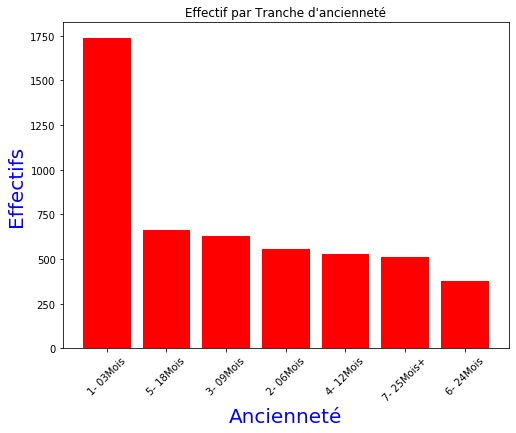

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=df["ANCIENNETE"].unique(), height=df["ANCIENNETE"].value_counts(), color='r')
ax.set_xlabel(xlabel='Ancienneté' ,color='b', size=20)
ax.set_ylabel(ylabel='Effectifs' ,color='b', size=20)
plt.xticks(rotation = 45)
plt.title("Effectif par Tranche d'ancienneté")
plt.show()

**Les clients ayant une ancienneté de 1 à 3 mois sont les plus nombreux. Ils sont environ 1750 soit 35% des clients. Les plus anciens c'est à dire ceux qui ont une ancienneté de 6 à 24 mois sont les moins nombreux environ 400 soit 8%.**

In [15]:
# variables quantitative(continues)
numeric_vars_columns =['VOL_DATA_M1' ,
'MONTANT_FACT_HT_M1',
'VOL_DATA_M2',
'MONTANT_OM_HT_M2',
'MONTANT_FACT_HT_M2',
'VOL_TOT_DATA_KO_M1', 
'VOL_TOT_VOIX_M1', 
'CONSO_M1', 
'VOL_TOT_DATA_KO_M2'
,'VOL_TOT_VOIX_M2', 
'CONSO_M2']

In [16]:
# Création d'une fonction de construction d'histogrammes et de manière interactive
def hist_plot(b):
    sns.distplot(df[b],kde=False)
    plt.title('Histogramme de ' +str(b))
    return plt.show()

In [17]:
#interact
interact(hist_plot, b = numeric_vars_columns);   

interactive(children=(Dropdown(description='b', options=('VOL_DATA_M1', 'MONTANT_FACT_HT_M1', 'VOL_DATA_M2', '…

Vous pouvez interagir avec le notebook en selectionnant la variable quantitative qui vous intéresse afin de visualiser sa distribution à travers son histogramme.

In [18]:
for i in numeric_vars_columns:
    print("Le coefficient d'asymétrie de la variable " + i, "est: " ,df[i].skew())

Le coefficient d'asymétrie de la variable VOL_DATA_M1 est:  4.52215592663575
Le coefficient d'asymétrie de la variable MONTANT_FACT_HT_M1 est:  11.467646151408648
Le coefficient d'asymétrie de la variable VOL_DATA_M2 est:  4.534014316466273
Le coefficient d'asymétrie de la variable MONTANT_OM_HT_M2 est:  4.45310888071626
Le coefficient d'asymétrie de la variable MONTANT_FACT_HT_M2 est:  8.21487711627182
Le coefficient d'asymétrie de la variable VOL_TOT_DATA_KO_M1 est:  3.0433309099584545
Le coefficient d'asymétrie de la variable VOL_TOT_VOIX_M1 est:  2.0390431726930194
Le coefficient d'asymétrie de la variable CONSO_M1 est:  4.382035464827729
Le coefficient d'asymétrie de la variable VOL_TOT_DATA_KO_M2 est:  3.4122732285323316
Le coefficient d'asymétrie de la variable VOL_TOT_VOIX_M2 est:  2.7739024206463503
Le coefficient d'asymétrie de la variable CONSO_M2 est:  4.009578784945109


**On observe donc en général une très forte asymétrie positive dans la distribution des données.**

In [27]:
#Description des variables quantitatives
df1 = pd.read_csv("C:/Users/HP/Desktop/ISE_2/Machine_Learning/PROJET/DataSet_FDD.csv", sep=";", index_col="ID",dtype={'CHURN':'category', 'AUTRE_ABONNEMENT':'category', 'STATUT_RC_M1':'category', 'STATUT_TRAFIC_M1':'category',
       'STATUT_FACT_M1':'category', 'STATUT_TRAFIC_M2':'category', 'STATUT_RC_M2':'category', 'STATUT_FACT_M2':'category'})
df1 = df1.drop("MONTANT_OM_HT_M1", axis = 1)
df1.describe()

,VOL_DATA_M1,MONTANT_FACT_HT_M1,VOL_DATA_M2,MONTANT_OM_HT_M2,MONTANT_FACT_HT_M2,VOL_TOT_DATA_KO_M1,VOL_TOT_VOIX_M1,CONSO_M1,VOL_TOT_DATA_KO_M2,VOL_TOT_VOIX_M2,CONSO_M2
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,10622.474627,202.544200,7438.129067,891.289256,160.172200,8.646443e+06,570.391740,9062.073946,8.184531e+06,579.232890,9617.798506
std,25680.421331,1926.870138,18848.854121,3060.934960,1628.113418,1.389074e+07,748.246872,11513.079406,1.386467e+07,776.577991,11940.361395
min,0.000000,0.000000,0.000000,0.000000,-21186.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.002953,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,49.200000,0.000000e+00,0.133333,99.400000
50%,6.047841,0.000000,2.346563,0.000000,0.000000,2.583005e+06,279.216667,6301.115000,1.954476e+06,276.175000,6600.000000
75%,8339.003188,0.000000,1426.791827,0.000000,0.000000,1.211749e+07,902.395833,13608.750000,1.136733e+07,905.895833,14748.260000
max,357829.286163,42372.000000,293438.909859,28925.619835,21186.000000,1.904546e+08,6923.116667,192123.000000,1.831086e+08,13192.816667,250839.600000


**Ci-dessus le tableau présentant les caractéristiques de tendances centrales et dispersions des variables quantitatives continues.**

## Analyse bivariée

### Analyse de la corrélation

In [28]:
# Calcul de la corrélation de Spearman

corr = df.corr(method='spearman')
corr.sort_values(['CHURN'], ascending=False, inplace=True)

print("\n--- Affichage des coefficients de corrélations de Spearman entre la variable CHURN et les autres variables. ---")
corr.CHURN


--- Affichage des coefficients de corrélations de Spearman entre la variable CHURN et les autres variables. ---


CHURN                 1.000000
STATUT_TRAFIC_M1      0.104340
AUTRE_ABONNEMENT      0.016026
STATUT_RC_M2         -0.005183
MONTANT_OM_HT_M2     -0.007571
CONSO_M1             -0.011935
CONSO_M2             -0.015283
VOL_TOT_DATA_KO_M1   -0.015572
VOL_TOT_DATA_KO_M2   -0.018346
VOL_DATA_M2          -0.025506
VOL_TOT_VOIX_M2      -0.031468
MONTANT_FACT_HT_M2   -0.034045
MONTANT_FACT_HT_M1   -0.038461
VOL_TOT_VOIX_M1      -0.039342
STATUT_FACT_M1       -0.044360
STATUT_FACT_M2       -0.048492
VOL_DATA_M1          -0.075194
STATUT_RC_M1         -0.088970
STATUT_TRAFIC_M2     -0.139119
Name: CHURN, dtype: float64

Nous constatons une faible corrélation entre la variable CHURN et certaines variables. 

Les variables les plus corrélées au CHURN sont :
- STATUT_TRAFIC_M1
- STATUT_FACT_M2
- STATUT_FACT_M1
- ANCIENNETE

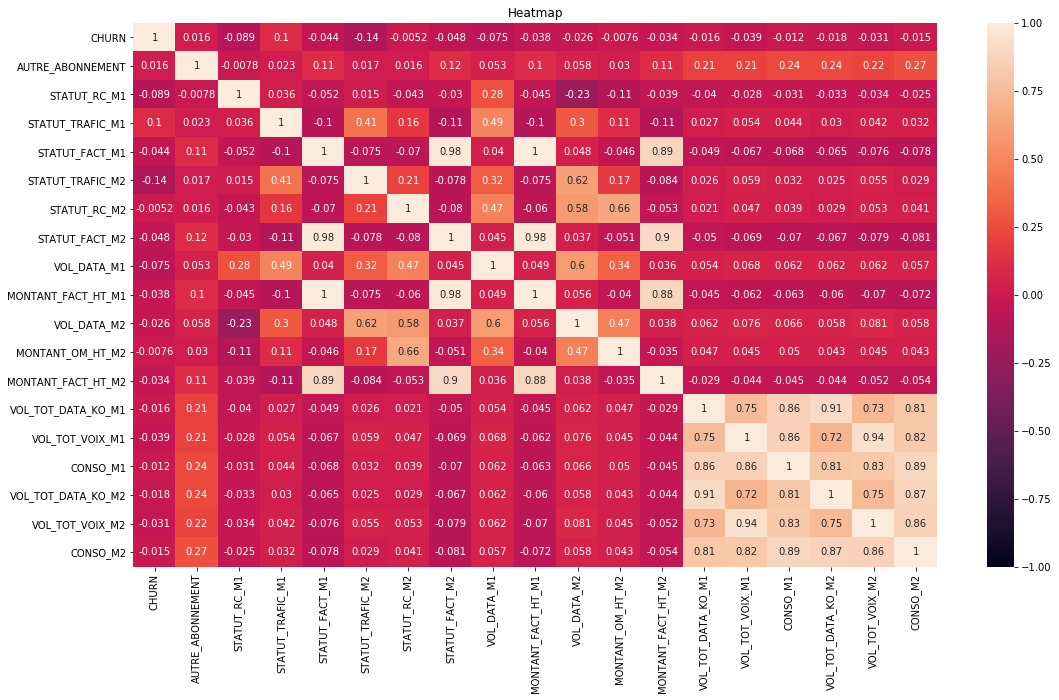

In [29]:
# Affichage du heatmap
plt.figure(figsize = (18, 10))
sns.heatmap(df.corr(method='spearman'),  vmin=-1,vmax=1, annot=True)
plt.title("Heatmap")
plt.show()

In [30]:
# Affichage de quelques valeurs de notre variable à prédire
df['CHURN'][:10]

ID
72814847    0
63091394    0
68479934    0
60533011    0
74240944    0
67218316    1
61775907    0
72910264    0
72890931    1
74969113    0
Name: CHURN, dtype: int64

In [31]:
# Affichage des proportions des modalités
df['CHURN'].value_counts()

0    4473
1     527
Name: CHURN, dtype: int64

Nous avons un déséquilibre dans les classes.

La proportion des individus ayant résilié est faible.

### Nous pouvons donc dire qu'en majorité, les clients restent fidèles à l'entreprise.

# Traitement des données

Y a-t-il des valeurs manquantes dans notre jeu de données? 

In [32]:
# Affichage du nombre de valeurs manquantes pour chaque variable
df.isna().sum()

CHURN                    0
AUTRE_ABONNEMENT         0
ANCIENNETE               0
STATUT_RC_M1             0
STATUT_TRAFIC_M1       624
STATUT_FACT_M1         624
STATUT_TRAFIC_M2      1121
STATUT_RC_M2             0
STATUT_FACT_M2        1121
VOL_DATA_M1              0
MONTANT_FACT_HT_M1       0
VOL_DATA_M2              0
MONTANT_OM_HT_M2         0
MONTANT_FACT_HT_M2       0
VOL_TOT_DATA_KO_M1       0
VOL_TOT_VOIX_M1          0
CONSO_M1                 0
VOL_TOT_DATA_KO_M2       0
VOL_TOT_VOIX_M2          0
CONSO_M2                 0
dtype: int64

In [33]:
# Récupération de la liste des variables qui comportent des valeurs manquantes
null_variables = df.columns[df.isnull().any()].tolist()
null_variables

['STATUT_TRAFIC_M1', 'STATUT_FACT_M1', 'STATUT_TRAFIC_M2', 'STATUT_FACT_M2']

Il y'a des valeurs manquantes dans les bases de données sur les variables suivantes : **STATUT_TRAFIC_M1**, **STATUT_FACT_M1**, **STATUT_TRAFIC_M2**, **STATUT_FACT_M2**

In [34]:
# Affichage des modalités qui comporte des valeurs manquantes
for col in null_variables:
    print(col, df[col].unique())

STATUT_TRAFIC_M1 [ 1.  0. nan]
STATUT_FACT_M1 [ 0. nan  1.]
STATUT_TRAFIC_M2 [ 1. nan  0.]
STATUT_FACT_M2 [ 0. nan  1.]


### Traitement des valeurs manquantes

Les variables manquantes sont catégorielles et comportent chacune deux modalités. 

Vu que les valeurs manquantes ne sont pas aléatoires, nous allons donc les imputer  en créant une troisième modalité "Je ne sais pas" avec la valeur -1.

In [35]:
# Imputation des valeurs manquantes
impute_value = -1 # Imputer les valeurs manquantes avec la valeur -1
for col in null_variables:
    df[col].fillna(impute_value, inplace=True) # Remplacer les valeurs manquantes par la valeur imputée

In [36]:
# Affichage de la base avec le traitement des valeurs manquantes
df.head(10)

,CHURN,AUTRE_ABONNEMENT,ANCIENNETE,STATUT_RC_M1,STATUT_TRAFIC_M1,STATUT_FACT_M1,STATUT_TRAFIC_M2,STATUT_RC_M2,STATUT_FACT_M2,VOL_DATA_M1,MONTANT_FACT_HT_M1,VOL_DATA_M2,MONTANT_OM_HT_M2,MONTANT_FACT_HT_M2,VOL_TOT_DATA_KO_M1,VOL_TOT_VOIX_M1,CONSO_M1,VOL_TOT_DATA_KO_M2,VOL_TOT_VOIX_M2,CONSO_M2
ID,,,,,,,,,,,,,,,,,,,,
72814847,0,1,1- 03Mois,0,1.0,0.0,1.0,1,0.0,14607.490139,0,10877.494672,0.000000,0,1.668031e+06,1550.166667,21563.55,7.511209e+05,1965.633333,33256.33
63091394,0,1,5- 18Mois,0,1.0,0.0,1.0,1,0.0,63345.120289,0,36718.363304,4132.231405,0,2.938960e+07,1941.483333,10000.00,4.009789e+06,316.966667,40001.62
68479934,0,1,3- 09Mois,1,1.0,0.0,1.0,0,0.0,83355.802775,0,16.051505,0.000000,0,1.123436e+07,1864.066667,24500.00,2.080931e+07,1852.283333,22502.26
60533011,0,0,5- 18Mois,0,1.0,0.0,1.0,0,0.0,3.163406,0,5.017221,0.000000,0,3.393805e+06,15.033333,7108.00,1.782441e+05,49.933333,3103.00
74240944,0,0,1- 03Mois,1,0.0,0.0,-1.0,0,-1.0,0.000000,0,0.000000,0.000000,0,5.990114e+06,858.283333,5060.00,7.683316e+06,1267.516667,3000.00
67218316,1,0,3- 09Mois,0,1.0,0.0,0.0,0,0.0,0.518638,0,0.000000,0.000000,0,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.00
61775907,0,0,5- 18Mois,0,1.0,0.0,0.0,0,0.0,1.763275,0,0.000000,0.000000,0,2.659557e+06,48.750000,1100.00,0.000000e+00,0.000000,0.00
72910264,0,0,1- 03Mois,0,1.0,0.0,1.0,1,0.0,38256.042929,0,2997.695283,0.000000,0,3.043016e+07,615.633333,19200.00,1.437340e+07,1105.633333,14000.00
72890931,1,1,1- 03Mois,0,1.0,0.0,1.0,1,0.0,8698.940615,0,25810.569751,0.000000,0,4.237045e+07,166.350000,27554.30,6.304181e+07,322.183333,32380.60


Maintenant que nous avons remplacé les valeurs manquantes par -1, verifions qu'il n'y a plus de valeurs manquantes

In [37]:
# Vérification
df.isna().sum()

CHURN                 0
AUTRE_ABONNEMENT      0
ANCIENNETE            0
STATUT_RC_M1          0
STATUT_TRAFIC_M1      0
STATUT_FACT_M1        0
STATUT_TRAFIC_M2      0
STATUT_RC_M2          0
STATUT_FACT_M2        0
VOL_DATA_M1           0
MONTANT_FACT_HT_M1    0
VOL_DATA_M2           0
MONTANT_OM_HT_M2      0
MONTANT_FACT_HT_M2    0
VOL_TOT_DATA_KO_M1    0
VOL_TOT_VOIX_M1       0
CONSO_M1              0
VOL_TOT_DATA_KO_M2    0
VOL_TOT_VOIX_M2       0
CONSO_M2              0
dtype: int64

# Nettoyage des données

Nous commençons par remplacer les points les virgules par les points pour nous assurer de la bonne validation du type des données.

In [38]:
df = df.replace(",", ".", regex=True)

Nous voulons recoder la modalité ANCIENNETE afin de la mettre dans un mode bien défini.

In [39]:
# Affichage des modalités de la variable ANCIENNETE
df["ANCIENNETE"].unique()

array(['1- 03Mois', '5- 18Mois', '3- 09Mois', '2- 06Mois', '4- 12Mois',
       '7- 25Mois+', '6- 24Mois'], dtype=object)

Recodons les modalités de la variable ANCIENNETE

In [40]:
# Recodage de la varables 
recodage = {'1- 03Mois': 1, '5- 18Mois': 2, '3- 09Mois' : 3,'2- 06Mois': 4, '4- 12Mois': 5, '7- 25Mois+': 6, '6- 24Mois': 7}

In [41]:
# Remplacement des données par les valeurs de recodage
df['ANCIENNETE'] = df['ANCIENNETE'].map(recodage)

In [42]:
# Vérification
df["ANCIENNETE"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

# Construction des échantillons

## Train, test, validation

In [43]:
X = df.drop('CHURN', axis = 1)
y = df['CHURN']
seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = seed, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, 
                                                    random_state = seed, stratify=y_test)

In [44]:
# Dimensions des bases de données

print("------ Dimensions des données d'entrainement -------")
print("Train :", X_train.shape)

print("\n------ Dimensions des données de validation -------")
print("Test :", X_test.shape)

      
print("\n------ Dimensions des données de test -------")
print("Val :", X_val.shape)

------ Dimensions des données d'entrainement -------
Train : (3500, 19)

------ Dimensions des données de validation -------
Test : (750, 19)

------ Dimensions des données de test -------
Val : (750, 19)


Etant donné le déséquilibre entre les modalités de la variable CHURN, nous allons procéder à un suréchantillonnage de la modalité la moins représentée.

## Rééchantillonage

### Sur échantillonnage

In [45]:
X2 = X_train
X2['CHURN'] = y_train.values

minority = X2[X2.CHURN == 1]
majority = X2[X2.CHURN == 0]

minority_upsampled = resample(minority, replace=True, n_samples = len(majority), random_state = seed)

upsampled = pd.concat([majority, minority_upsampled])

upsampled

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,AUTRE_ABONNEMENT,ANCIENNETE,STATUT_RC_M1,STATUT_TRAFIC_M1,STATUT_FACT_M1,STATUT_TRAFIC_M2,STATUT_RC_M2,STATUT_FACT_M2,VOL_DATA_M1,MONTANT_FACT_HT_M1,VOL_DATA_M2,MONTANT_OM_HT_M2,MONTANT_FACT_HT_M2,VOL_TOT_DATA_KO_M1,VOL_TOT_VOIX_M1,CONSO_M1,VOL_TOT_DATA_KO_M2,VOL_TOT_VOIX_M2,CONSO_M2,CHURN
ID,,,,,,,,,,,,,,,,,,,,
50588394,1,6,0,1.0,0.0,1.0,0,0.0,13.430252,0,4.864058,0.000000,0,1.265780e+07,2875.733333,28501.03,4.259225e+06,3173.916667,30399.05,0
60611415,0,2,0,1.0,0.0,1.0,0,0.0,17958.360283,0,2.323441,0.000000,0,0.000000e+00,99.033333,2150.00,0.000000e+00,97.883333,2650.85,0
69970095,0,4,0,1.0,0.0,1.0,0,0.0,3.677383,0,6.005781,0.000000,0,4.296979e+06,843.066667,12407.00,5.590349e+06,1622.366667,18900.98,0
74940370,0,1,0,-1.0,-1.0,-1.0,0,-1.0,0.000000,0,0.000000,0.000000,0,1.861370e+06,82.983333,5232.00,5.869998e+06,10.216667,7226.00,0
69900363,0,4,1,1.0,0.0,1.0,0,0.0,38382.964807,0,15860.427475,0.000000,0,6.581925e+05,725.266667,10532.00,6.476297e+05,649.700000,10790.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64275641,1,5,0,1.0,0.0,0.0,0,0.0,11340.806749,0,0.000000,0.000000,0,4.587476e+06,395.516667,11900.00,2.701206e+06,234.816667,10097.90,1
54819701,0,7,0,1.0,0.0,1.0,0,0.0,30002.059182,0,30870.656802,0.000000,0,0.000000e+00,0.000000,0.00,0.000000e+00,0.000000,0.00,1
66286488,0,3,0,1.0,0.0,1.0,1,0.0,44.280056,0,3442.848120,6198.347107,0,7.385490e+06,1549.866667,18996.00,1.690091e+07,1812.000000,18700.00,1


In [46]:
# Vérification de la districution de la variable "CHURN"
upsampled['CHURN'].value_counts(normalize = True)

1    0.5
0    0.5
Name: CHURN, dtype: float64

In [47]:
X_train_up = upsampled.drop('CHURN', axis=1)
y_train_up = upsampled['CHURN']

### Choix du dataset pour continuer le modèle

In [48]:
train_features = X_train_up
train_labels = y_train_up

In [49]:
print(train_features.dtypes)

AUTRE_ABONNEMENT        int64
ANCIENNETE              int64
STATUT_RC_M1            int64
STATUT_TRAFIC_M1      float64
STATUT_FACT_M1        float64
STATUT_TRAFIC_M2      float64
STATUT_RC_M2            int64
STATUT_FACT_M2        float64
VOL_DATA_M1           float64
MONTANT_FACT_HT_M1      int64
VOL_DATA_M2           float64
MONTANT_OM_HT_M2      float64
MONTANT_FACT_HT_M2      int64
VOL_TOT_DATA_KO_M1    float64
VOL_TOT_VOIX_M1       float64
CONSO_M1              float64
VOL_TOT_DATA_KO_M2    float64
VOL_TOT_VOIX_M2       float64
CONSO_M2              float64
dtype: object


In [50]:
# Convertion des colonnes en catégorie
cat_cols = ['AUTRE_ABONNEMENT', 'ANCIENNETE', 'STATUT_RC_M1', 'STATUT_RC_M2', 'STATUT_TRAFIC_M1', 'STATUT_TRAFIC_M2',  'STATUT_FACT_M1', 'STATUT_FACT_M2']
train_features[cat_cols] = train_features[cat_cols].astype('str')

# Vérification du nouveau type de données
print(train_features.dtypes)

AUTRE_ABONNEMENT       object
ANCIENNETE             object
STATUT_RC_M1           object
STATUT_TRAFIC_M1       object
STATUT_FACT_M1         object
STATUT_TRAFIC_M2       object
STATUT_RC_M2           object
STATUT_FACT_M2         object
VOL_DATA_M1           float64
MONTANT_FACT_HT_M1      int64
VOL_DATA_M2           float64
MONTANT_OM_HT_M2      float64
MONTANT_FACT_HT_M2      int64
VOL_TOT_DATA_KO_M1    float64
VOL_TOT_VOIX_M1       float64
CONSO_M1              float64
VOL_TOT_DATA_KO_M2    float64
VOL_TOT_VOIX_M2       float64
CONSO_M2              float64
dtype: object


# Normalisation des données

In [51]:
# Sélectionner les variables numériques
num_cols = train_features.select_dtypes(include=['int', 'float']).columns.tolist()

# Instanciation de l'objet
scaler = preprocessing.MinMaxScaler()

# Entrainement
mod_scaler = scaler.fit(train_features[num_cols])

# Application à l'ensemble des échantillons
train_features[num_cols] = mod_scaler.transform(train_features[num_cols])
X_val[num_cols] = mod_scaler.transform(X_val[num_cols])
X_test[num_cols] = mod_scaler.transform(X_test[num_cols])

In [52]:
# Remise des données dans un dataFrame
train_features = pd.DataFrame(train_features, columns = X.columns)
X_val = pd.DataFrame(X_val, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [53]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6262 entries, 50588394 to 68518579
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AUTRE_ABONNEMENT    6262 non-null   object 
 1   ANCIENNETE          6262 non-null   object 
 2   STATUT_RC_M1        6262 non-null   object 
 3   STATUT_TRAFIC_M1    6262 non-null   object 
 4   STATUT_FACT_M1      6262 non-null   object 
 5   STATUT_TRAFIC_M2    6262 non-null   object 
 6   STATUT_RC_M2        6262 non-null   object 
 7   STATUT_FACT_M2      6262 non-null   object 
 8   VOL_DATA_M1         6262 non-null   float64
 9   MONTANT_FACT_HT_M1  6262 non-null   int64  
 10  VOL_DATA_M2         6262 non-null   float64
 11  MONTANT_OM_HT_M2    6262 non-null   float64
 12  MONTANT_FACT_HT_M2  6262 non-null   int64  
 13  VOL_TOT_DATA_KO_M1  6262 non-null   float64
 14  VOL_TOT_VOIX_M1     6262 non-null   float64
 15  CONSO_M1            6262 non-null   float64


In [54]:
train_features.head()

,AUTRE_ABONNEMENT,ANCIENNETE,STATUT_RC_M1,STATUT_TRAFIC_M1,STATUT_FACT_M1,STATUT_TRAFIC_M2,STATUT_RC_M2,STATUT_FACT_M2,VOL_DATA_M1,MONTANT_FACT_HT_M1,VOL_DATA_M2,MONTANT_OM_HT_M2,MONTANT_FACT_HT_M2,VOL_TOT_DATA_KO_M1,VOL_TOT_VOIX_M1,CONSO_M1,VOL_TOT_DATA_KO_M2,VOL_TOT_VOIX_M2,CONSO_M2
ID,,,,,,,,,,,,,,,,,,,
50588394,1,6,0,1.0,0.0,1.0,0,0.0,0.000038,0,0.000017,0.0,0,0.066461,0.415381,0.150376,0.027765,0.240579,0.207810
60611415,0,2,0,1.0,0.0,1.0,0,0.0,0.050187,0,0.000008,0.0,0,0.000000,0.014305,0.011344,0.000000,0.007419,0.018121
69970095,0,4,0,1.0,0.0,1.0,0,0.0,0.000010,0,0.000020,0.0,0,0.022562,0.121776,0.065462,0.036442,0.122973,0.129208
74940370,0,1,0,-1.0,-1.0,-1.0,0,-1.0,0.000000,0,0.000000,0.0,0,0.009773,0.011986,0.027605,0.038265,0.000774,0.049397
69900363,0,4,1,1.0,0.0,1.0,0,0.0,0.107266,0,0.054050,0.0,0,0.003456,0.104760,0.055569,0.004222,0.049246,0.073761


# Modelisation

## Sélection des variables

Nous choisissons le F1 score pour choisir les meilleures variables prédictrices

In [56]:
rf = RandomForestClassifier()
rf.fit(train_features, train_labels)
print(classification_report(y_val, rf.predict(X_val)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       671
           1       0.40      0.27      0.32        79

    accuracy                           0.88       750
   macro avg       0.66      0.61      0.63       750
weighted avg       0.86      0.88      0.87       750



### Importance des variables

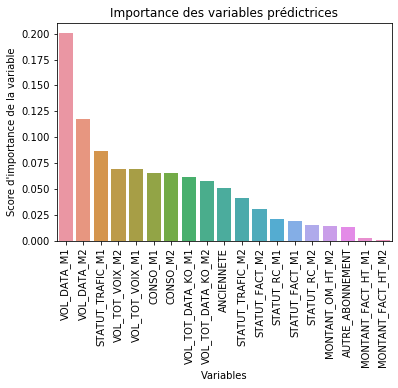

In [57]:
vars_imp = (pd.Series(rf.feature_importances_, index = train_features.columns).sort_values(ascending = False))
sns.barplot(x = vars_imp.index, y = vars_imp)
plt.xticks(rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables prédictrices")
plt.show()

In [58]:
vars_imp

VOL_DATA_M1           0.200223
VOL_DATA_M2           0.117049
STATUT_TRAFIC_M1      0.086622
VOL_TOT_VOIX_M2       0.069462
VOL_TOT_VOIX_M1       0.069094
CONSO_M1              0.065560
CONSO_M2              0.065277
VOL_TOT_DATA_KO_M1    0.061545
VOL_TOT_DATA_KO_M2    0.057979
ANCIENNETE            0.050856
STATUT_TRAFIC_M2      0.041283
STATUT_FACT_M2        0.030083
STATUT_RC_M1          0.020903
STATUT_FACT_M1        0.019321
STATUT_RC_M2          0.014823
MONTANT_OM_HT_M2      0.013695
AUTRE_ABONNEMENT      0.013280
MONTANT_FACT_HT_M1    0.002162
MONTANT_FACT_HT_M2    0.000785
dtype: float64

In [59]:
seuil = 0.004
vars_selected = vars_imp[vars_imp > seuil].index.to_list()
print("Nous avons sélectionné", len(vars_selected), "variables qui sont :", vars_selected)

Nous avons sélectionné 17 variables qui sont : ['VOL_DATA_M1', 'VOL_DATA_M2', 'STATUT_TRAFIC_M1', 'VOL_TOT_VOIX_M2', 'VOL_TOT_VOIX_M1', 'CONSO_M1', 'CONSO_M2', 'VOL_TOT_DATA_KO_M1', 'VOL_TOT_DATA_KO_M2', 'ANCIENNETE', 'STATUT_TRAFIC_M2', 'STATUT_FACT_M2', 'STATUT_RC_M1', 'STATUT_FACT_M1', 'STATUT_RC_M2', 'MONTANT_OM_HT_M2', 'AUTRE_ABONNEMENT']


In [60]:
train_features = train_features[vars_selected]
X_val = X_val[vars_selected]
X_test = X_test[vars_selected]

Pour la modélisation, on partira des modèles les plus siples aux plus complexes.
En effet, malgré la robustesse des méthodes complexes de modélisations (ex : méthodes ensemblistes), elles sont peu utilisées car elles sont difficilement interprétables et explicables aux métiers.
Les méthodes que nous étudierons sont : 
- Régression Logistique, Random Forest, Decision Tree Classifier
- Méthode à noyau : SVM
- Réseau de neurones : MLPClassifier
- Méthodes ensemblistes : Gradient Boosting

Pour fixer les paramètres, nous utilisons une méthode de cross-validation avec un GridsearchCV qui utilisera la métrique de notre choix afin de valider le modèle.

**Métriques d'évaluation**

- Accuracy

- Précision

## Modèle de regression logistique

In [61]:
# Paramètres
param = {'C': [0.001, 0.01, 1, 10, 50, 100, 500]}

# GridsearchCV
grid_logreg_class = GridSearchCV(estimator = LogisticRegression(random_state = seed, max_iter = 500), #estimateur
                                 param_grid = param, # Grille de paramètres
                                 scoring="accuracy", #métrique d'évaluation 
                                 cv=5 #Nombre de cross-validation
                                )

# Entrainement du modèle
logreg_model = grid_logreg_class.fit(train_features, train_labels)

# Métrique du modèle d'entrainement et paramètres
print("Accuracy sur l'ensemble d'entrainement ---->", round(logreg_model.best_score_,3))
print("Les paramètres choisis pour le modèle  ---->", logreg_model.best_estimator_)

Accuracy sur l'ensemble d'entrainement ----> 0.703
Les paramètres choisis pour le modèle  ----> LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Fonction d'évaluation

In [62]:
def model_evaluation(model, features, labels, threshold=0.5):
    # Obtenir les probabilités de chaque classe pour chaque exemple
    probs = model.predict_proba(features)

    # Convertir les probabilités en prédictions de classe binaire en fonction du seuil de décision
    pred = (probs[:, 1] >= threshold).astype(int)

    # Calculer les métriques d'évaluation et afficher les résultats
    print("\n-- Métriques d'évaluation --")
    print(classification_report(labels, pred))

In [63]:
# Utilisation de la fonction avec un seuil de prédiction de 0.8
model_evaluation(logreg_model, X_test, y_test, threshold=0.8)


-- Métriques d'évaluation --
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       671
           1       0.34      0.14      0.20        79

    accuracy                           0.88       750
   macro avg       0.62      0.55      0.57       750
weighted avg       0.85      0.88      0.86       750



## Modèle de Random Forest

In [64]:
# Paramètres
param_rf = {'n_estimators': [10, 50, 100, 500, 1000], 'max_depth': [3, 5, 10, 20, None]}

#GridsearchCV
grid_rf_class = GridSearchCV(estimator = RandomForestClassifier(random_state = seed), 
                            param_grid = param_rf, scoring="accuracy",cv=5)

#Entrainement du modèle
rf_model = grid_rf_class.fit(train_features, train_labels)

# Métrique du modèle d'entrainement et paramètres
print("Accuracy sur l'ensemble d'entrainement ---->", round(rf_model.best_score_,3))
print("Les paramètres choisis pour le modèle  ---->", rf_model.best_estimator_)

Accuracy sur l'ensemble d'entrainement ----> 0.974
Les paramètres choisis pour le modèle  ----> RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [65]:
model_evaluation(rf_model, X_test, y_test, threshold=0.7)


-- Métriques d'évaluation --
              precision    recall  f1-score   support

           0       0.90      0.99      0.95       671
           1       0.60      0.08      0.13        79

    accuracy                           0.90       750
   macro avg       0.75      0.53      0.54       750
weighted avg       0.87      0.90      0.86       750



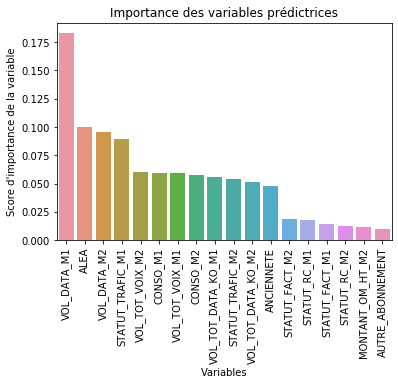

In [151]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_features, train_labels)

vars_imp = (pd.Series(rf_model.feature_importances_, index = train_features.columns).sort_values(ascending = False))

sns.barplot(x = vars_imp.index, y = vars_imp)
plt.xticks(rotation = 90)
plt.xlabel("Variables")
plt.ylabel("Score d'importance de la variable")
plt.title("Importance des variables prédictrices")
plt.show()

# Modèle SVM

In [152]:
# Paramètres
svm_model = SVC(random_state = seed)
param={'kernel':['linear','rbf'], 'C':[0.1, 1, 10, 50, 100]}

# GridsearchCV
grid_svm= GridSearchCV(svm_model,param_grid=param,cv=5,scoring="accuracy")

# Entrainement du modèle
grid_svm.fit(train_features,train_labels)

# Métrique du modèle d'entrainement et paramètres
print("Accuracy sur l'ensemble d'entrainement ---->", round(grid_svm.best_score_,3))
print("Les paramètres choisis pour le modèle  ---->", grid_svm.best_estimator_)

Accuracy sur l'ensemble d'entrainement ----> 0.733
Les paramètres choisis pour le modèle  ----> SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)


In [153]:
# Evaluation

y_pred = grid_svm.predict(X_test)
grid_svm.score(X_test, y_test)

0.5506666666666666

# MLPClassifier

In [154]:
mlp = MLPClassifier(random_state=seed, max_iter=1000)
parameters = {'hidden_layer_sizes': [(50,), (100,), (200,)], 'learning_rate': ['constant', 'invscaling', 'adaptive']}
mlp_cv = GridSearchCV(mlp, parameters, scoring='accuracy', cv=5, n_jobs=-1)
mlp_cv.fit(train_features, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=42, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'h

In [155]:
print(round(mlp_cv.best_score_,3))
print(mlp_cv.best_estimator_)

0.756
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=42, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [156]:
model_evaluation(mlp_cv.best_estimator_, X_val, y_val)


-- Métriques d'évaluation --
              precision    recall  f1-score   support

           0       0.94      0.65      0.77       671
           1       0.18      0.66      0.28        79

    accuracy                           0.65       750
   macro avg       0.56      0.65      0.52       750
weighted avg       0.86      0.65      0.71       750



## Choix du meilleur modèle 

### Les performances ont clairement montré que le meilleur modèle est le Random Forest. De plus, ce modèle est facilement interprétable, c'est celui qui nous servira pour la suite.

In [157]:
# Enregistrement du modèle dans un fichier pickle
with open('C:/Users/HP/Desktop/ISE_2/Machine_Learning/PROJET/rf_model.pickle', 'wb') as f:
    pickle.dump(rf_model, f)

In [158]:
# Chargement du modèle à partir du fichier pickle
with open('C:/Users/HP/Desktop/ISE_2/Machine_Learning/PROJET/rf_model.pickle', 'rb') as f:
    loaded_model = pickle.load(f)